In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# impoeting file 
file_path = r"C:\Users\haris\Desktop\Insurance\insurance.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handling missing values if necessary (example: forward fill)
data.fillna(method='ffill', inplace=True)


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\haris\AppData\Local\Temp\ipykernel_5588\714866939.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
# Check the shape of the data
print("Shape of the dataset:", data.shape)

# Check data types and summary
data.info()

Shape of the dataset: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Forward fill missing values
data = data.ffill()

# Alternatively, backward fill missing values
# data = data.bfill()

In [12]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [14]:
data['age'] = data['age'].ffill()  # Replace 'age' with the column you want to process

In [16]:
data = data.ffill()

In [18]:
# Forward fill specific column
data['age'] = data['age'].ffill()  # Replace 'age' with the actual column name


In [20]:
print(data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


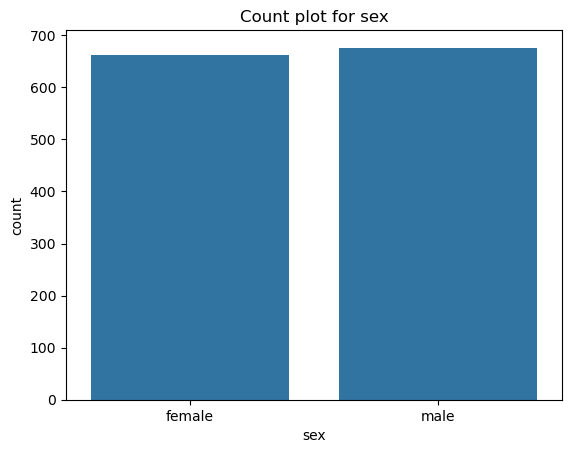

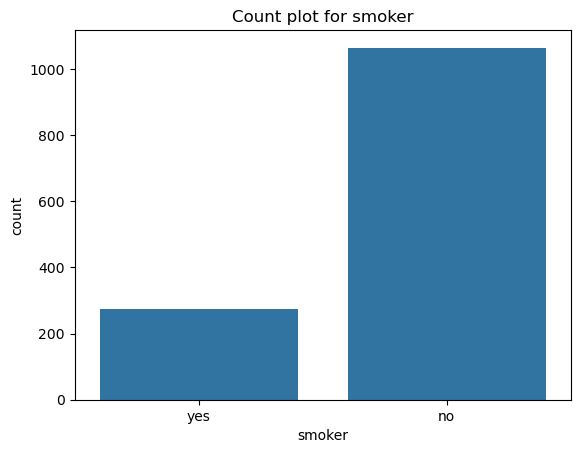

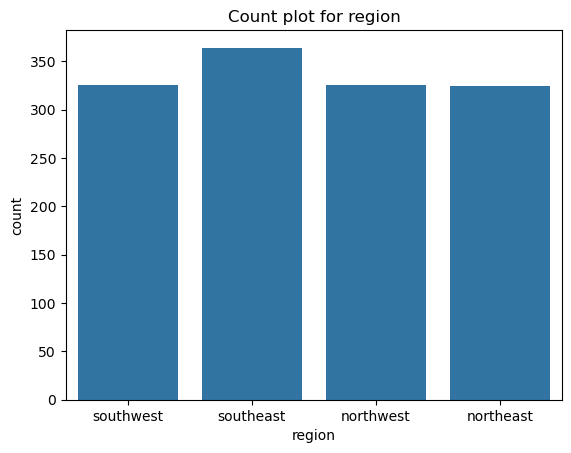

In [22]:
#Exploreing Relationships
#Count Plot for Categorical Variables
# Count plots for categorical variables
categorical_columns = ['sex', 'smoker', 'region']
for column in categorical_columns:
    sns.countplot(x=column, data=data)
    plt.title(f"Count plot for {column}")
    plt.show()


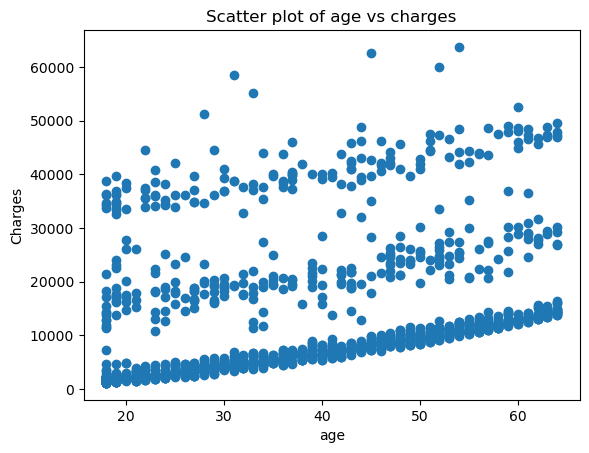

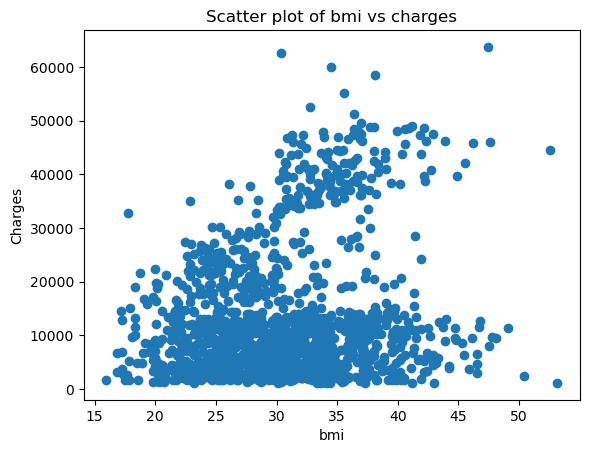

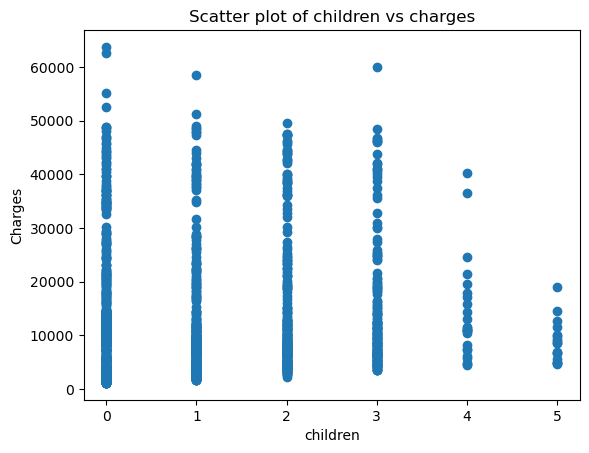

In [24]:
# Scatter plot for numerical variables vs charges
numerical_columns = ['age', 'bmi', 'children']
for column in numerical_columns:
    plt.scatter(data[column], data['charges'])
    plt.title(f"Scatter plot of {column} vs charges")
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.show()

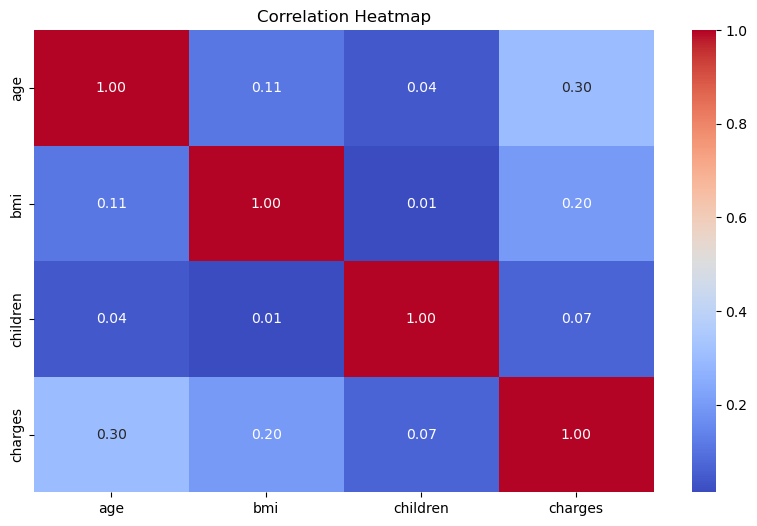

In [26]:
# only numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = ['sex', 'smoker', 'region']  # Update based on your data
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])


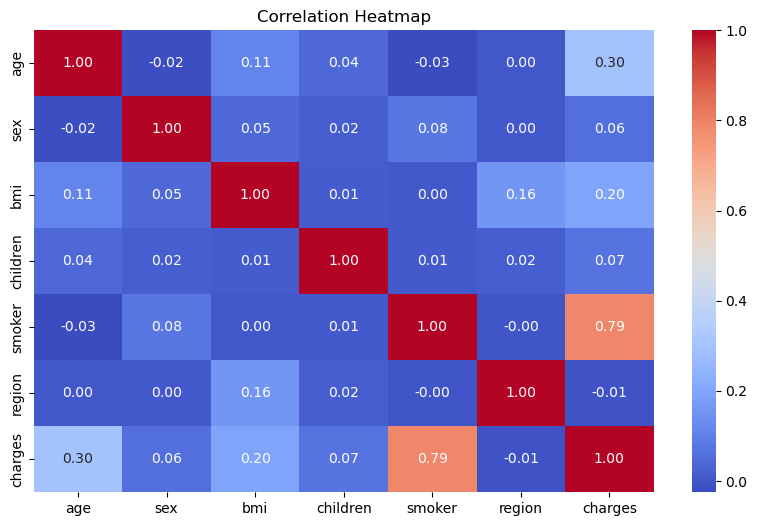

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [32]:
print(data.dtypes)


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object


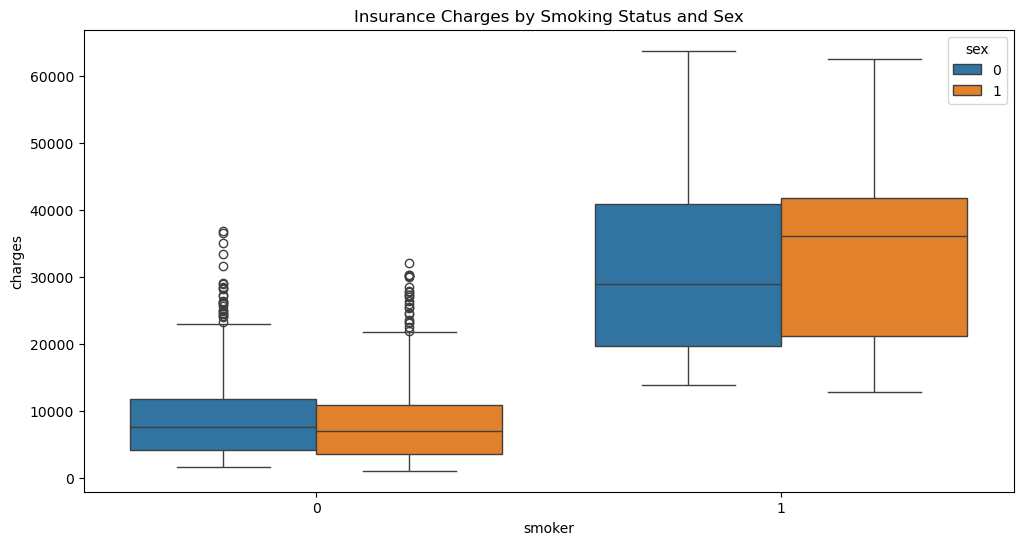

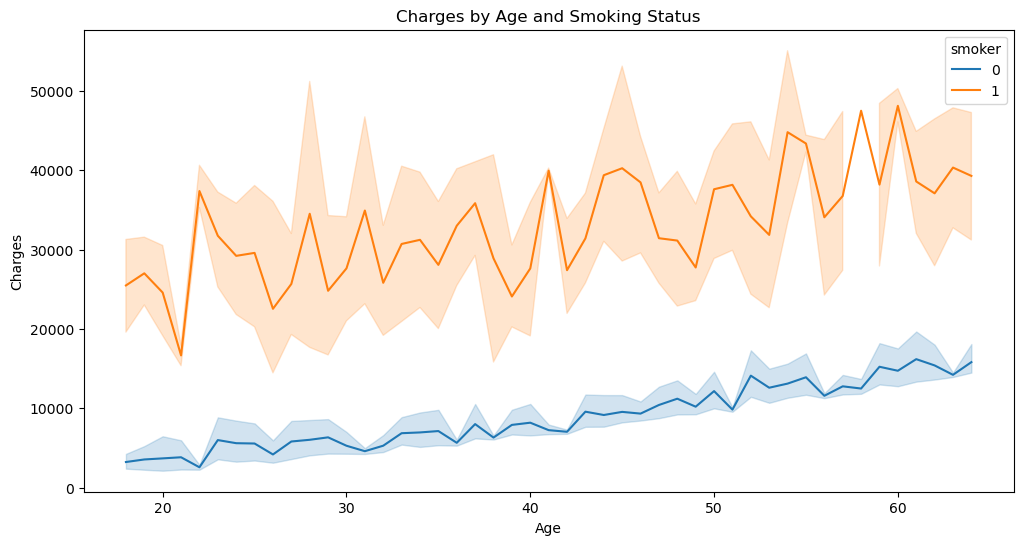

In [34]:
#Analyzing Premium Charges by Smoking Status and Age
# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=data, hue='sex')
plt.title("Insurance Charges by Smoking Status and Sex")
plt.show()

# Line plot for charges by age for smokers and non-smokers
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='charges', hue='smoker', data=data)
plt.title("Charges by Age and Smoking Status")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


In [36]:
#Data Preprocessing for Modeling
#Encode Categorical Variables
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [38]:
#Feature Selection and Splitting Data
# Define features (X) and target (y)
X = data.drop(columns=['charges'])
y = data['charges']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#Train a Regression Mode
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Linear Regression Evaluation:
Mean Absolute Error: 4186.508898366435
Mean Squared Error: 33635210.431178406
R^2 Score: 0.7833463107364539


In [42]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R^2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Evaluation:
Mean Absolute Error: 3154.705668541045
Mean Squared Error: 49003243.60682007
R^2 Score: 0.6843565603663775


In [44]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Evaluation:
Mean Absolute Error: 2533.674643617756
Mean Squared Error: 21073365.415079337
R^2 Score: 0.8642606273649586
